In [121]:
#import and difinitions
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


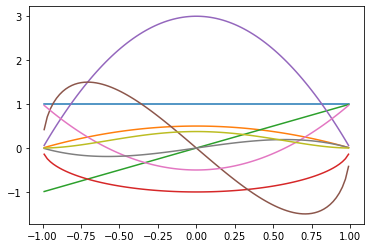

In [122]:
facttable=[math.factorial(x) for x in range(0,40)]
def factorial(x):   
    return facttable[x]

#The Legendre polynomials    
def P(l,m, x):
    # evaluate an Associated Legendre Polynomial P(l,m,x) at x
    pmm = 1.0
    if m>0:
        somx2 = math.sqrt((1.0-x)*(1.0+x))
        fact = 1.0
        for i in range(1,m+1):
            pmm *= -fact * somx2
            fact += 2.0

    if l==m:
        return pmm
    pmmp1 = x * (2.0*m+1.0) * pmm
    if l==m+1:
        return pmmp1
    pll = 0.0
    for ll in range( m+2, l+1):
        pll = ( (2.0*ll-1.0)*x*pmmp1-(ll+m-1.0)*pmm ) / (ll-m)
        pmm = pmmp1
        pmmp1 = pll
    return pll

XAxis = [((x+0.5)/100.0-0.5)*2 for x in range(0,100)]
plt.plot(XAxis,[P(0,0,((x+0.5)/100.0-0.5)*2) for x in range(0,100)])
plt.plot(XAxis,[P(1,-1,((x+0.5)/100.0-0.5)*2) for x in range(0,100)])
plt.plot(XAxis,[P(1,0,((x+0.5)/100.0-0.5)*2) for x in range(0,100)])
plt.plot(XAxis,[P(1,1,((x+0.5)/100.0-0.5)*2) for x in range(0,100)])
plt.plot(XAxis,[P(2,2,((x+0.5)/100.0-0.5)*2) for x in range(0,100)])
plt.plot(XAxis,[P(2,1,((x+0.5)/100.0-0.5)*2) for x in range(0,100)])
plt.plot(XAxis,[P(2,0,((x+0.5)/100.0-0.5)*2) for x in range(0,100)])
plt.plot(XAxis,[P(2,-1,((x+0.5)/100.0-0.5)*2) for x in range(0,100)])
plt.plot(XAxis,[P(2,-2,((x+0.5)/100.0-0.5)*2) for x in range(0,100)])


In [123]:
# renormalisation constant for SH function
def K(l,m):
    temp = ((2.0*l+1.0)*factorial(l-m)) / (4.0*math.pi*factorial(l+m))
    return math.sqrt(temp)
#spherical harmonic funcion
def SH(l, m, theta, phi):
    sqrt2 = math.sqrt(2.0)
    if m==0:
        return K(l,0)*P(l,m,math.cos(theta))
    elif m>0:
        return sqrt2*K(l,m)*math.cos(m*phi)*P(l,m,math.cos(theta))
    else:
        return sqrt2*K(l,-m)*math.sin(-m*phi)*P(l,-m,math.cos(theta))



In [124]:
from collections import namedtuple
Sample = namedtuple('Sample',['x' , 'y','z','theta','phi','coeffs'])
def getSamples(N):
    s=[]
    n = float(N)
    for i in range(N):
        for j in range(N):
            theta = 2.0* math.acos(math.sqrt(1.0-(i+random.random() )/n))
            phi = (j+random.random() )/n*math.pi*2
            x = math.cos(phi)*math.sin(theta)
            y = math.sin(phi)*math.sin(theta)
            z = math.cos(theta)
            coeffs=[]
            for l in range(0,4):
                for m in range(-l,l+1):
                    coeffs.append(SH(l,m,theta,phi))
            s.append(Sample(x,y,z,theta,phi,coeffs))
    return s
    


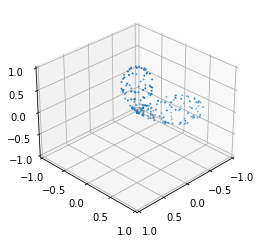

In [125]:
def myFunc(theta, phi):

    return max(0,5*math.cos(theta)-4) + max(0,-4*math.sin(theta-math.pi)*math.cos(phi-2.5)-3)
#visualize myFunc
def visMyFunc():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    x=[]
    y=[]
    z=[]
    N = 30
    samples = getSamples(N)
    for s in samples:
            theta = s.theta
            phi = s.phi
            xx = math.cos(phi)*math.sin(theta)
            yy = math.sin(phi)*math.sin(theta)
            zz = math.cos(theta)
            v = myFunc(theta, phi)
            x.append(xx*v)
            y.append(yy*v)
            z.append(zz*v)

    ax.scatter(x, y, z, s=1)
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
   
    ax.view_init(30, 45) 
    
visMyFunc()

In [126]:

N = 200
result=[]

v = [0]*16
samples = getSamples(N)
weight = 4*math.pi
oneOverN = 1/(N*N)
factor = weight*oneOverN

for s in samples:
    f = myFunc(s.theta, s.phi)
    for i in range(16):
        v[i] += s.coeffs[i]*f*factor


print (["%.6f" % elem for elem in v])


['0.398744', '-0.210751', '0.286377', '0.281811', '-0.315252', '-0.000137', '0.131128', '-0.000001', '0.093014', '-0.249869', '0.000060', '0.123248', '0.303616', '-0.165108', '-0.000018', '-0.092612']


In [127]:

# l = Symbol("l")
# m = Symbol("m")
# pi = Symbol("pi")
# class MyK(Function):
#     @classmethod
#     def eval(cls, l,m):
#         temp = ((2.0*l+1.0)*factorial(l-m)) / (4.0*pi*factorial(l+m))
#         return functions.elementary.miscellaneous.sqrt(temp)
#     def _eval_is_real(self):
#         return true
# init_printing()



# for ll in range(0,4):
#     for mm in range(-ll,ll+1):
#         l=ll
#         m=mm
#         pprint(MyK(l,m))
